# Checking the expected contents of the Fram Strait IFT Database

For each year from 2003-2020, we need:
- Truecolor and falsecolor imagery
- Labeled raw segmentation output

Only missing file is the SOIT data for 20130331-20130501

In [2]:
import os
import pandas as pd

In [3]:
def get_month_folder(date):
    """Simple utility for navigating file structure"""
    start = '{y}{m}01'.format(y=date.year,
                              m=str(date.month).zfill(2))
    end = '{y}{m}01'.format(y=date.year,
                              m=str(date.month + 1).zfill(2))
    if (date.month == 3) | (date.month == 4):
        start = '{y}0331'.format(y=date.year)
        end = '{y}0501'.format(y=date.year)
    
    return '-'.join(['fram_strait', start, end])

In [4]:
dataloc = '/Volumes/Research/ENG_Wilhelmus_Shared/group/IFT_fram_strait_dataset/'

In [5]:
# Truecolor - passed already
# Falsecolor - passed already
# Labeled Raw - passed already

# Pixel brightness - not set up yet, needs falsecolor
recheck_image_files = [] # Can add 'truecolor', 'falsecolor', 'labeled_raw'. Later: 'labeled_clean'

for year in range(2003, 2021):
    year_folder = 'fram_strait-{y}'.format(y=year)
    assert os.path.isdir(os.path.join(dataloc, year_folder)), 'Data missing for {y}'.format(year)
                         
    days = pd.date_range('{y}-03-31'.format(y=year), '{y}-09-30'.format(y=year), freq='1D')
    for day in days:
        if day.day == 1: # only need to check once per month

            # is the month folder there?
            assert os.path.isdir(os.path.join(dataloc, year_folder, month_folder)), 'Month folder missing ' + month_folder

            # is there a SOIT file
            start, end = pd.to_datetime(month_folder.split('-')[1]), pd.to_datetime(month_folder.split('-')[2])
            end += pd.to_timedelta('1D')
            soit_name = 'passtimes_lat76.0015_lon-18.4315_{d1}_{d2}.csv'.format(d1=start.strftime('%m%d%Y'),
                                                        d2=end.strftime('%m%d%Y'))
            if not os.path.isfile(os.path.join(dataloc, year_folder, month_folder, soit_name)):
                print('Missing SOIT file in ' + month_folder)

            for image_type in recheck_image_files:
                if not os.path.isdir(os.path.join(dataloc, year_folder, month_folder, 'labeled_raw')):
                    print('Missing', image_type, 'folder in', month_folder)

        # Slower check
        month_folder = get_month_folder(day)
        for image_type in recheck_image_files:
            for satellite in ['aqua', 'terra']:
                for image_type in ['falsecolor']:#, 'falsecolor', 'labeled_raw']:
                    filepath = os.path.join(dataloc, year_folder, month_folder, image_type,
                                            '.'.join([day.strftime('%Y%m%d'), satellite, image_type, '250m', 'tiff'])
                                           )
                    if not os.path.isfile(filepath):
                        missing_images.append([satellite, image_type, day])
                        # print('Missing', satellite, image_type, day)

        # check if truecolor image exists
        # check if falsecolor image exists
        # check if labeled_raw image exists
    # for each month:
        # check if SOIT file exists
    # check if ift_properties and tracked floes exists

Missing SOIT file in fram_strait-20130331-20130501
Missing SOIT file in fram_strait-20130331-20130501


In [113]:
ift_df = pd.read_csv('../data/all_floes/ift_floe_properties_pixel_brightness_2003.csv')

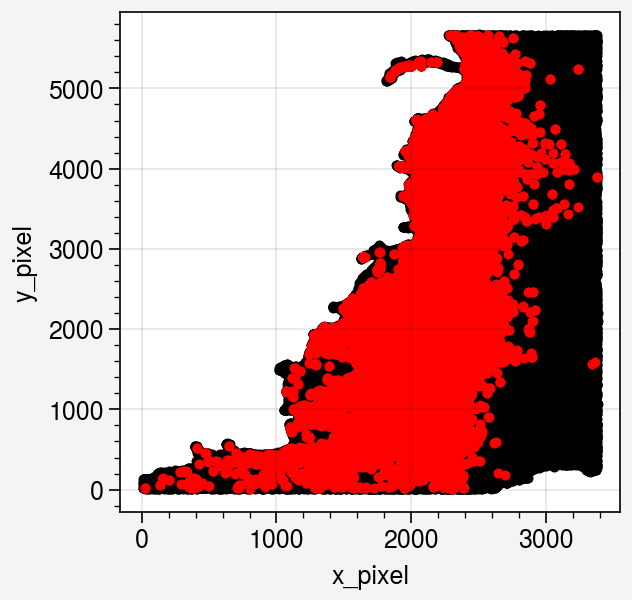

In [114]:
import proplot as pplt
fig, ax = pplt.subplots()
ax.scatter(ift_df.x_pixel, ift_df.y_pixel, color='k', m='.')
ax.scatter(ift_df.loc[ift_df.floe_id != 'unmatched'].x_pixel,
           ift_df.loc[ift_df.floe_id != 'unmatched'].y_pixel, color='r', m='.')

In [115]:
rename = {'centroid-0': 'row_pixel',
          'centroid-1': 'col_pixel',
          'major_axis': 'axis_major_length_matlab',
          'minor_axis': 'axis_minor_length_matlab',
          'bbox-0': 'bbox_min_row',
          'bbox-1': 'bbox_min_col',
          'bbox-2': 'bbox_max_row',
          'bbox-3': 'bbox_max_col'}
          
order = ['datetime','satellite',  'floe_id', 'label',
         'longitude', 'latitude', 'x_stere', 'y_stere', 'col_pixel', 'row_pixel',
         'area', 'perimeter', 'solidity', 'orientation', 'circularity',
         'axis_major_length', 'axis_minor_length',
         'bbox_min_row', 'bbox_min_col', 'bbox_max_row', 'bbox_max_col',
         'area_matlab', 'perimeter_matlab', 'solidity_matlab', 'orientation_matlab',
         'nsidc_sic',
         'tc_channel0', 'tc_channel1', 'tc_channel2',
         'fc_channel0', 'fc_channel1', 'fc_channel2']

Index(['Unnamed: 0', 'area_matlab', 'perimeter_matlab', 'major_axis',
       'minor_axis', 'orientation_matlab', 'x_pixel', 'y_pixel', 'convex_area',
       'solidity_matlab', 'bbox1', 'bbox2', 'bbox3', 'bbox4', 'orig_idx',
       'satellite', 'floe_id', 'datetime', 'x_stere', 'y_stere', 'longitude',
       'latitude', 'nsidc_sic', 'label', 'tc_channel0', 'tc_channel1',
       'tc_channel2', 'area', 'perimeter', 'solidity', 'bbox-0', 'bbox-1',
       'bbox-2', 'bbox-3', 'centroid-0', 'centroid-1', 'orientation',
       'fc_channel0', 'fc_channel1', 'fc_channel2', 'circularity'],
      dtype='object')